In [1]:
from statsbombpy import sb

In [2]:
events = sb.events(match_id=3773585)

C:\Users\alexa\anaconda3\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [26]:
shots = events.loc[(events['type'] == 'Shot')]

In [5]:
shots["shot_outcome"]

3998      Saved
3999    Blocked
4004      Off T
Name: shot_outcome, dtype: object

In [6]:
shot_outcome = {
    "Blocked": "Blocked",
    "Goal": "Goal",
    "Off T": "Off Target",
    "Post": "Off Target",
    "Saved": "On Target",
    "Wayward": "Off Target",
    "Saved Off T": "Off Target",
    "Saved To Post": "On Target"
}

In [27]:
location_blocked = shots[shots["shot_outcome"] == "Blocked"]['location'].tolist()
blocked_end_location = shots[shots["shot_outcome"] == "Blocked"]['shot_end_location'].tolist()
location_goal = shots[shots["shot_outcome"] == "Goal"]['location'].tolist()
goal_end_location = shots[shots["shot_outcome"] == "Goal"]['shot_end_location'].tolist()
location_on_target = shots[(shots["shot_outcome"] == "Saved") | (shots["shot_outcome"] == "Saved To Post")]['location'].tolist()
on_target_end_location = shots[(shots["shot_outcome"] == "Saved") | (shots["shot_outcome"] == "Saved To Post")]['shot_end_location'].tolist()
location_off_target = shots[(shots["shot_outcome"] == "Off T") | (shots["shot_outcome"] == "Post") | (shots["shot_outcome"] == "Wayward") | (shots["shot_outcome"] == "Saved Off T")]['location'].tolist()
off_target_end_location = shots[(shots["shot_outcome"] == "Off T") | (shots["shot_outcome"] == "Post") | (shots["shot_outcome"] == "Wayward") | (shots["shot_outcome"] == "Saved Off T")]['shot_end_location'].tolist()

In [17]:
import pandas as pd

In [28]:
x1_blocked = pd.Series([el[0] for el in location_blocked])
y1_blocked = pd.Series([el[1] for el in location_blocked])
x2_blocked = pd.Series([el[0] for el in blocked_end_location])
y2_blocked = pd.Series([el[1] for el in blocked_end_location])

In [29]:
x1_goal = pd.Series([el[0] for el in location_goal])
y1_goal = pd.Series([el[1] for el in location_goal])
x2_goal = pd.Series([el[0] for el in goal_end_location])
y2_goal = pd.Series([el[1] for el in goal_end_location])

In [30]:
x1_ont = pd.Series([el[0] for el in location_on_target])
y1_ont = pd.Series([el[1] for el in location_on_target])
x2_ont = pd.Series([el[0] for el in on_target_end_location])
y2_ont = pd.Series([el[1] for el in on_target_end_location])

In [31]:
x1_offt = pd.Series([el[0] for el in location_off_target])
y1_offt = pd.Series([el[1] for el in location_off_target])
x2_offt = pd.Series([el[0] for el in off_target_end_location])
y2_offt = pd.Series([el[1] for el in off_target_end_location])

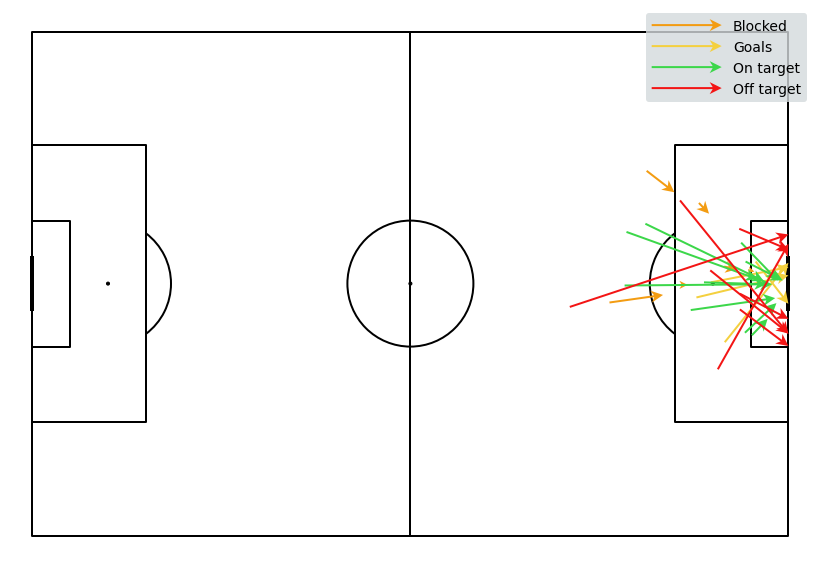

In [32]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#FFFFFF', line_color='#000000')
fig, ax = pitch.draw(figsize=(12, 8))

pitch.arrows(x1_blocked, y1_blocked,
             x2_blocked, y2_blocked, width=2,
             headwidth=6, headlength=6, color='#F39C12', ax=ax, label='Blocked')

pitch.arrows(x1_goal, y1_goal,
             x2_goal, y2_goal, width=2,
             headwidth=6, headlength=6, color='#F4D03F', ax=ax, label='Goals')

pitch.arrows(x1_ont, y1_ont,
             x2_ont, y2_ont, width=2,
             headwidth=6, headlength=6, color='#3CD74A', ax=ax, label='On target')

pitch.arrows(x1_offt, y1_offt,
             x2_offt, y2_offt, width=2,
             headwidth=6, headlength=6, color='#F31515', ax=ax, label='Off target')

# Setup the legend
ax.legend(facecolor='#D4DADC', handlelength=5, edgecolor='None', fontsize=14, loc='best')
plt.show()